# Загрузка данных

https://drive.google.com/file/d/1CqK8IzFg5AD_T406-enYQdlzBUaHnbUc/view?usp=sharing - ссылка на архив, в котором находятся данные, что были преобразованы в одобренной hw1 (https://github.com/kwillon/ML_HW_411451_/blob/052ba9b3770f3defd3ff98005b4f53327096e8df/Credit.ipynb)

In [118]:
! gdown --id 1CqK8IzFg5AD_T406-enYQdlzBUaHnbUc # архив в гугле

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1CqK8IzFg5AD_T406-enYQdlzBUaHnbUc
To: /content/Credit_data_encod.zip
100% 1.33M/1.33M [00:00<00:00, 106MB/s]


In [119]:
! unzip /content/Credit_data_encod.zip # Распаковка архива

Archive:  /content/Credit_data_encod.zip
replace test_output.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Подгрузка данных и работа с ними

In [120]:
!pip install optuna

In [169]:
!pip install shap > None

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns

In [122]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [123]:
from sklearn.dummy import DummyClassifier

In [170]:
import matplotlib.pyplot as plt
import shap

In [171]:
from sklearn.model_selection import cross_val_score

In [125]:
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [126]:
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

In [158]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [144]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_blobs
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

from xgboost import XGBRegressor

import warnings
warnings.simplefilter('ignore')

In [151]:
import optuna
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from optuna.visualization import plot_optimization_history

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [127]:
df_train = pd.read_csv("/content/train_output.csv")
df_test = pd.read_csv("/content/test_output.csv")

In [128]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           45211 non-null  int64  
 1   age                  45211 non-null  float64
 2   marital              45211 non-null  int64  
 3   balance              45211 non-null  float64
 4   housing              45211 non-null  int64  
 5   loan                 45211 non-null  int64  
 6   day                  45211 non-null  float64
 7   duration             45211 non-null  float64
 8   campaign             45211 non-null  float64
 9   y                    45211 non-null  int64  
 10  job_admin.           45211 non-null  int64  
 11  job_blue-collar      45211 non-null  int64  
 12  job_entrepreneur     45211 non-null  int64  
 13  job_housemaid        45211 non-null  int64  
 14  job_management       45211 non-null  int64  
 15  job_retired          45211 non-null 

In [129]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           4521 non-null   int64  
 1   age                  4521 non-null   float64
 2   marital              4521 non-null   int64  
 3   balance              4521 non-null   float64
 4   housing              4521 non-null   int64  
 5   loan                 4521 non-null   int64  
 6   day                  4521 non-null   float64
 7   duration             4521 non-null   float64
 8   campaign             4521 non-null   float64
 9   y                    4521 non-null   int64  
 10  job_admin.           4521 non-null   int64  
 11  job_blue-collar      4521 non-null   int64  
 12  job_entrepreneur     4521 non-null   int64  
 13  job_housemaid        4521 non-null   int64  
 14  job_management       4521 non-null   int64  
 15  job_retired          4521 non-null   i

Посмотрим на первые строки, чтобы проверить, что все данные выводятся правильно

In [130]:
df_test.sample(5)

,Unnamed: 0,age,marital,balance,housing,loan,day,duration,campaign,y,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1709,1709,0.40,1,0.05,1,0,0.87,0.07,0.02,1,...,0,1,0,0,0,0,0,0,0,1
1711,1711,0.19,0,0.07,0,0,0.63,0.12,0.02,0,...,0,0,0,1,0,0,0,0,0,1
4198,4198,0.22,1,0.05,0,0,0.63,0.03,0.00,1,...,0,0,0,0,0,0,0,0,0,1
2605,2605,0.43,1,0.05,1,1,0.43,0.05,0.00,0,...,0,0,1,0,0,0,0,0,0,1
142,142,0.54,0,0.07,1,0,0.97,0.03,0.00,0,...,0,0,1,0,0,0,0,0,0,1


Опять эта колонка Unnamed мешается, надо её убрать

In [131]:
df_train = df_train.drop(['Unnamed: 0'], axis=1)
df_test = df_test.drop(['Unnamed: 0'],  axis=1)

Также были замечены некоторые колонки, что далжны были быть убраны, но по какой-то причине снова появились, поэтому тут они были убраны вновь

In [206]:
cols_to_drop = ['housing', 'marital']
df_train.drop(columns=cols_to_drop, inplace=True)
df_test.drop(columns=cols_to_drop, inplace=True)

KeyError: ignored

# Разделение данных на тренировочный и тестовый набор

In [182]:
X = df_train.drop(['y'], axis=1)
y = df_train['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2023, test_size=0.25)

assert X_train.shape[0] + X_test.shape[0] == df_train.shape[0]

print(X_train.shape[0], X_test.shape[0], df_train.shape[0])

33908 11303 45211


Подготовим заранее отложенную тестовую выборку

In [183]:
X_test = df_test.drop(['y'], axis=1)
y_test = df_test['y']

# Простая модель логистической регрессии

Точность baseline 0.88

In [184]:
dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

accuracy_score(y_test, y_pred_dummy)

0.8847600088476001

А простой логистической регрессии 0.89

In [185]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_test, y_pred_lr)

0.898252598982526

Посмотрим что произойдёт если добавить кросcвалидацию в тренировочных данных, используем 3 фолда

In [186]:
scores = cross_val_score(lr, df_train, y, cv=3)
print("accuracy: {}".format(scores))

accuracy: [1. 1. 1.]


Видимо что-то идёт не так, надо понять что

In [187]:
print("mean accuracy: {:.2f}".format(scores.mean()))

mean accuracy: 1.00


Согласно матрице ошибок, ложно положительные овтеты тоже существую, то есть наша модель тоже ошибается. Верных ответов 3760+221 и ложных 240+300

In [188]:
confusion_matrix(y_test, y_pred_lr)

array([[3761,  239],
       [ 221,  300]])

Однако у нашей простой модели высокая точность и f1 мера

In [189]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4000
           1       0.56      0.58      0.57       521

    accuracy                           0.90      4521
   macro avg       0.75      0.76      0.75      4521
weighted avg       0.90      0.90      0.90      4521



Согласно полученным метрикам, точность классификации объектов класса '0' (без кредита) составляет 94%, что свидетельствует о высоком уровне правильных предсказаний для этого класса. Однако точность для класса '1' (с кредитом) значительно ниже — всего 56%, что объясняется меньшим количеством данных для данного класса.

Макросредние значения для precision и recall составляют почти одинаковые 0.75 и 0.76 соответственно, что говорит о сбалансированности модели в контексте различных классов. Эти результаты были получены после добавления кросс-валидации, что позволило улучшить обобщающую способность модели.

# Гиперпараметры Grid Search

Мы проведем подбор гиперпараметров с помощью Halving Grid Search, так как этот метод оптимально подходит для моделей как регрессии, так и классификации. Halving Grid Search позволяет эффективно исследовать пространство гиперпараметров, сокращая количество проверяемых комбинаций, что способствует более быстрому нахождению оптимальных значений

In [190]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression()),
    ]
)

In [191]:
model = pipeline.fit(X_train, y_train)
y_pred_simple = model.predict(X_test)
print(classification_report(y_test, y_pred_simple))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4000
           1       0.53      0.61      0.57       521

    accuracy                           0.89      4521
   macro avg       0.74      0.77      0.75      4521
weighted avg       0.90      0.89      0.90      4521



Согласно полученным метрикам, наблюдается перекос в предсказании классов. Точность классификации объектов класса '0' (без кредита) составляет 95%, что указывает на высокую производительность модели в этом классе. В то же время точность для класса '1' (с кредитом) значительно ниже — всего 53%.

Recall для класса '1' равен 61%, что также свидетельствует о том, что модель не в полной мере справляется с идентификацией положительных случаев. Макросредние значения precision и recall составляют 0.74 и 0.77 соответственно, что указывает на определённое несоответствие в способности модели к правильной классификации, особенно для менее представленного класса '1'.

Таким образом, перекос в предсказании является значительной проблемой, которая требует подбора гиперпараметров.

In [192]:
%%time

X, y = make_classification(n_samples=4000, n_features=12, random_state=0)

clf = RandomForestClassifier(n_estimators=20, random_state=0)

param_dist = {
    "max_depth": [3, None],
    "max_features": np.arange(1, 6),
    "min_samples_split": np.arange(2, 11),
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"],
}

rsh = HalvingRandomSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    factor=2, # кратность кандидатов в выборке
    random_state=0,
)
rsh.fit(X, y)

CPU times: user 1min 15s, sys: 346 ms, total: 1min 16s
Wall time: 1min 17s


HalvingRandomSearchCV(estimator=RandomForestClassifier(n_estimators=20,
                                                       random_state=0),
                      factor=2,
                      param_distributions={'bootstrap': [True, False],
                                           'criterion': ['gini', 'entropy'],
                                           'max_depth': [3, None],
                                           'max_features': array([1, 2, 3, 4, 5]),
                                           'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10])},
                      random_state=0)

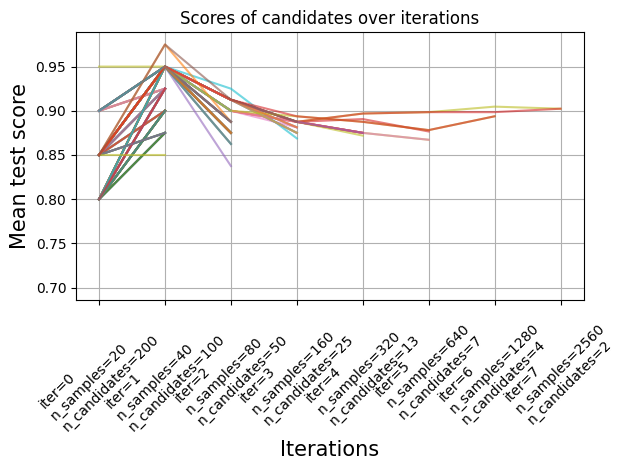

In [193]:
results = pd.DataFrame(rsh.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)
mean_scores = results.pivot(
    index="iter",
    columns="params_str",
     values="mean_test_score",
)
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={rsh.n_resources_[i]}\nn_candidates={rsh.n_candidates_[i]}"
    for i in range(rsh.n_iterations_)
]

ax.set_xticks(range(rsh.n_iterations_))
ax.set_xticklabels(labels, rotation=45, multialignment="left")
ax.set_title("Scores of candidates over iterations")
ax.set_ylabel("Mean test score", fontsize=15)
ax.set_xlabel("Iterations", fontsize=15)
plt.tight_layout()
plt.grid()
plt.show()

В ходе эксперимента было проведено 7 итераций. Как видно из результатов, самые высокие показатели теста были достигнуты на 2-й итерации. Однако к 4-й итерации результаты практически сравнялись, что может указывать на стабилизацию производительности модели. Это также может свидетельствовать о том, что модель достигла своего предела в текущих условиях, и дальнейшие итерации не привнесли значительных улучшений.

In [194]:
def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["SVC", "RandomForest"])
    if classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10)
        classifier_obj = SVC(C=svc_c, gamma="auto")
    else:
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32)
        classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)

    score = cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

# Optuna

В качестве эксперимента мы попробуем подобрать гиперпараметры для других моделей с помощью библиотеки Optuna. Этот инструмент предоставляет гибкий и эффективный подход к оптимизации гиперпараметров, позволяя автоматически исследовать пространство параметров и находить лучшие комбинации для улучшения производительности моделей.

In [195]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=15)

[I 2023-12-26 22:26:03,855] A new study created in memory with name: no-name-f663b22d-fb3d-4868-8e0c-055257175c4f
[I 2023-12-26 22:26:07,461] Trial 0 finished with value: 0.8267503532554802 and parameters: {'classifier': 'SVC', 'svc_c': 5273354111.873635}. Best is trial 0 with value: 0.8267503532554802.
[I 2023-12-26 22:26:10,635] Trial 1 finished with value: 0.8267503532554802 and parameters: {'classifier': 'SVC', 'svc_c': 9855608344.431683}. Best is trial 0 with value: 0.8267503532554802.
[I 2023-12-26 22:26:10,987] Trial 2 finished with value: 0.9090006759560955 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 8}. Best is trial 2 with value: 0.9090006759560955.
[I 2023-12-26 22:26:11,321] Trial 3 finished with value: 0.9069992385652635 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 11}. Best is trial 2 with value: 0.9090006759560955.
[I 2023-12-26 22:26:11,751] Trial 4 finished with value: 0.9015014248314702 and parameters: {'classifier': 'RandomForest'

Посмотрим на лучшие гиперпараметры. Из полученных результатов видно, что мы можем построить модель Random Forest с глубиной 8 или использовать Categorical Distribution с параметрами: high=32, log=False, low=2 и step=1. Эти значения могут помочь улучшить производительность модели в нашей задаче.

In [196]:
print(study.best_trial)

FrozenTrial(number=9, state=TrialState.COMPLETE, values=[0.9100001762059705], datetime_start=datetime.datetime(2023, 12, 26, 22, 26, 19, 476803), datetime_complete=datetime.datetime(2023, 12, 26, 22, 26, 19, 724125), params={'classifier': 'RandomForest', 'rf_max_depth': 21}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('SVC', 'RandomForest')), 'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1)}, trial_id=9, value=None)


Как видно из оптимизационного графика, некоторые наши значения находятся в пределах лучших значений гиперпараметров. Это свидетельствует о том, что модель имеет потенциал для дальнейшего улучшения и оптимизации, а также указывает на успешный подбор параметров, способствующий повышению производительности

In [197]:
plot_optimization_history(study)

Согласно графику на слайде снизу, для построения модели Random Forest оптимальная максимальная глубина дерева находится в диапазоне около 10. При проведении кросс-валидации рекомендуется не опускаться ниже глубины 4, так как это может негативно сказаться на производительности модели. Эти наблюдения подчеркивают важность правильного выбора гиперпараметров для достижения наилучших результатов.

In [198]:
from optuna.visualization import plot_slice

plot_slice(study)

# Выбор и обучение модели

Так как у нас есть только две подходящие модели — Random Forest и Categorical Distribution, я выбираю построить модель Random Forest. Согласно графику slice plot, она демонстрирует больше объективных значений, что указывает на её потенциально лучшую производительность в данной задаче.

In [199]:
rf = RandomForestRegressor(random_state=2023)
rf.fit(X_train, y_train)
y_preds = rf.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, y_preds, squared=False)}')

RMSE: 0.29339164126604994


В нашем случае корень средней квадратичной ошибки (RMSE) стремится к нулю, что указывает на небольшое расстояние между предсказанными значениями и фактическими данными. Учитывая, что наша переменная находится в диапазоне от 0 до 1, такое значение RMSE можно считать нормальным, что свидетельствует о хорошей точности модели в предсказаниях.

In [200]:
parameters = {
    'n_estimators': np.arange(50, 160, 20),
    'max_depth': list(range(2, 9)) + [None], #как мы помним максимальная глубина нашего леса может быть только 8, но так как в range права граница не входит в список значений, то пишем на единицу больше
    'random_state': [2023],
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=parameters,
    n_jobs=2,
    verbose=1,
    cv=3,
)

В ходе эксперимента мы использовали 3 фолда и 44 кандидата для подбора гиперпараметров, что составляет выборку из 144 комбинаций. Такой подход позволяет эффективно оценить производительность модели и выбрать наилучшие параметры

In [201]:
%%time

grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
max_depth: None
n_estimators: 150
random_state: 2023
CPU times: user 47.4 s, sys: 1.53 s, total: 48.9 s
Wall time: 13min 24s


In [202]:
y_preds = grid_search.best_estimator_.predict(X_test)
print(f'RMSE: {mean_squared_error(y_test, y_preds, squared=False)}')

RMSE: 0.2929177043778812


Как можно заметить, значения RMSE до и после проведения Grid Search практически идентичны: до оптимизации оно составило 0.2938, а после — 0.2935. Это свидетельствует о том, что процесс подбора гиперпараметров не привел к значительным улучшениям в точности модели, и, возможно, стоит рассмотреть другие методы оптимизации или переосмыслить выбор используемой модели.

Как видно из графика, самым значимым параметром для нашей модели является 'duration' (продолжительность контакта). Также заметное влияние оказывают параметры 'day', 'month', 'age' и 'poutcome' (результат предыдущей кампании). В то же время характеристики, такие как 'job' (работа), 'housing' (дом) и 'marital status' (брак), практически не влияют на предсказания модели, что указывает на их незначительность в данной задаче.

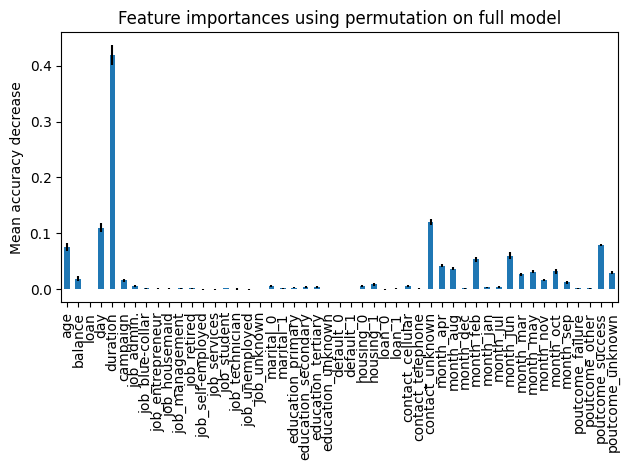

In [203]:
importances = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=2023, n_jobs=2)
forest_importances = pd.Series(importances.importances_mean, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=importances.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

Построим SHAP-диаграмму, чтобы проанализировать влияние признаков на предсказания модели. SHAP (SHapley Additive exPlanations) позволяет понять, как каждый признак влияет на итоговое предсказание, выделяя как положительное, так и отрицательное влияние. Это даст нам возможность глубже понять, какие факторы наиболее существенно способствуют результатам модели.

In [204]:
explainer = shap.TreeExplainer(rf)

Как видно из графика, на наличие депозита наиболее значительное влияние оказывают такие факторы, как продолжительность контакта с клиентом в предыдущей кампании (duration), удачный исход предыдущей маркетинговой кампании (poutcome_success), контактная информация (которая не включает номера телефонов или адреса электронной почты), а также возраст клиента. В то же время, самым незначительным фактором оказалась информация о месяце, в котором клиент последний раз контактировал с банком.

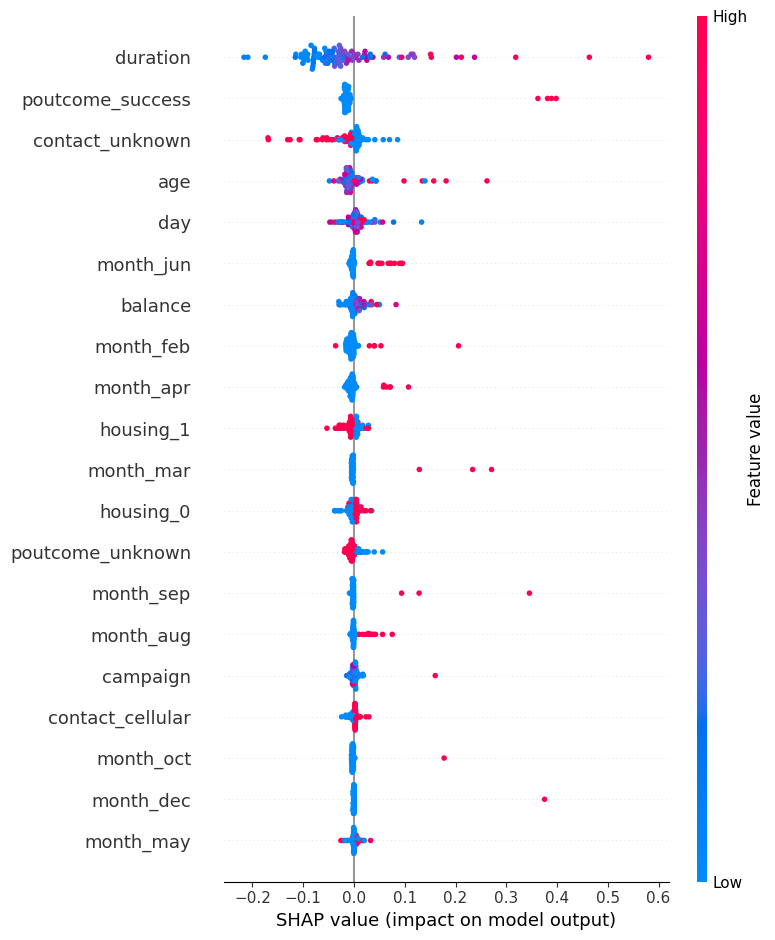

In [205]:
shap_values = explainer.shap_values(X_train.iloc[:100])
shap.summary_plot(shap_values, X_train.iloc[:100])

# Интерпретиритации моделей

Согласно полученным значениям, наша модель довольно успешно предсказывает, кто не будет брать срочный депозит, а также выявляет факторы, влияющие на решение о его оформлении. Интересно отметить, что ожидаемые ключевые факторы, такие как материальное положение, семейный статус и наличие жилья, не оказались столь значительными признаками, как предполагалось.

Тем не менее, точность предсказаний для людей, которые собираются взять депозит, требует улучшения. Для этого необходимо собрать или сгенерировать больше данных для класса '1' (взяли депозит), что поможет сбалансировать классы и повысить эффективность модели.

# Критерии задания 3 и что было сделано

1. Выбрана модель
2. Произведен выбор гиперпараметров с skikitlearn
3. Гиперпарметры подобраны с optuna
4. Модель обучена с значениями гиперпараметров
5. Произведено измерение на отложенной выборки с использованием ранее выбранной метрики
6. Произведена визуализация простой модели
7. Проведедено экспертное мнение о полученной интерпритации




